In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [32]:
class ComplexGridworld:
    def __init__(self, size=10, start=(0,0), goals_rewards={(9,9): 10, (7,7): 5, (8,2): 3}, obstacles=[(2,2), (3,3), (5,5), (6,6), (7,3)], slip_prob=0.1):
        self.size = size
        self.start = start
        self.goals_rewards = goals_rewards
        self.obstacles = obstacles
        self.state = self.start
        self.grid = self._build_grid()
        self.slip_prob = slip_prob

    def _build_grid(self):
        grid = np.zeros((self.size, self.size))
        for goal, _ in self.goals_rewards.items():
            if self.goals_rewards[goal] == 10:  # Primary goal
                grid[goal] = 1
            else:  # Secondary goals
                grid[goal] = 0.6
        for obs in self.obstacles:
            grid[obs] = -1
        return grid


    def render(self):
      grid_display = self.grid.copy()
      grid_display[self.state] = 2  # Agent's position
      grid_display[self.start] = 3  # Start position


      # Define custom color map
      from matplotlib.colors import ListedColormap
      colors = ['red', 'white', 'darkgreen', 'lime', 'cyan', 'blue']
      cmap = ListedColormap(colors)

      plt.imshow(grid_display, cmap=cmap)

      plt.title('Gridworld')
      plt.xticks([]), plt.yticks([])

      # Define custom legend
      from matplotlib.lines import Line2D
      legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Start', markersize=10, markerfacecolor='blue'),
        Line2D([0], [0], marker='o', color='w', label='Agent', markersize=10, markerfacecolor='cyan'),
        Line2D([0], [0], marker='o', color='w', label='Primary Goal', markersize=10, markerfacecolor='lime'),
        Line2D([0], [0], marker='o', color='w', label='Secondary Goal', markersize=10, markerfacecolor='darkgreen'),
        Line2D([0], [0], marker='o', color='w', label='Obstacle', markersize=10, markerfacecolor='red')
      ]

      plt.legend(handles=legend_elements, loc='upper right')

      plt.pause(0.5)
      plt.clf()


    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        if np.random.uniform(0, 1) < self.slip_prob:
            action = np.random.choice([0, 1, 2, 3])

        x, y = self.state
        if action == 0:  # up
            x = max(0, x-1)
        elif action == 1:  # down
            x = min(self.size-1, x+1)
        elif action == 2:  # left
            y = max(0, y-1)
        elif action == 3:  # right
            y = min(self.size-1, y+1)

        next_state = (x, y)

        if next_state in self.obstacles:
            reward = -5
            done = True
        elif next_state in self.goals_rewards:
            reward = self.goals_rewards[next_state]
            done = True
        else:
            reward = -1
            done = False

        self.state = next_state
        return next_state, reward, done


In [23]:
class QLearningAgent:
    def __init__(self, actions, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.actions = actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = {}

    def get_q_value(self, state, action):
        return self.q_table.get((state, action), 0.0)

    def choose_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(self.actions)
        else:
            q_values = [self.get_q_value(state, a) for a in self.actions]
            return np.argmax(q_values)

    def learn(self, state, action, reward, next_state, done):
        predict = self.get_q_value(state, action)
        if done:
            target = reward
        else:
            target = reward + self.gamma * np.max([self.get_q_value(next_state, a) for a in self.actions])

        self.q_table[(state, action)] = predict + self.alpha * (target - predict)


In [24]:
class EnhancedQLearningAgent(QLearningAgent):
    def __init__(self, actions, alpha=0.1, gamma=0.9, epsilon=0.3, epsilon_decay=0.995):
        super().__init__(actions, alpha, gamma, epsilon)
        self.epsilon_decay = epsilon_decay

    def decay_epsilon(self):
        self.epsilon *= self.epsilon_decay


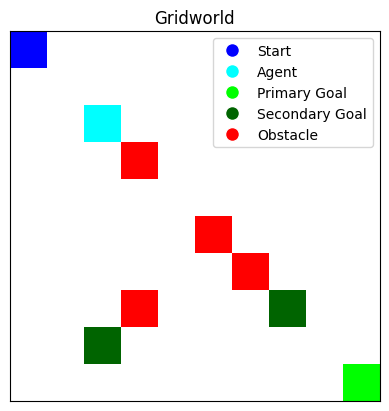

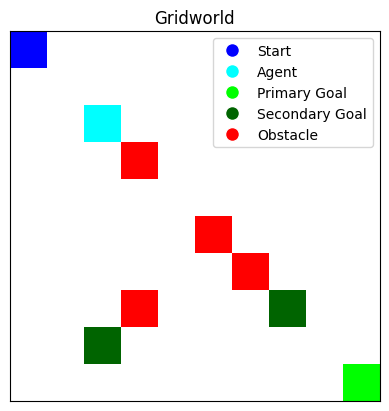

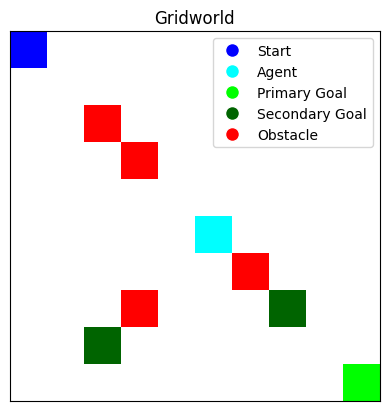

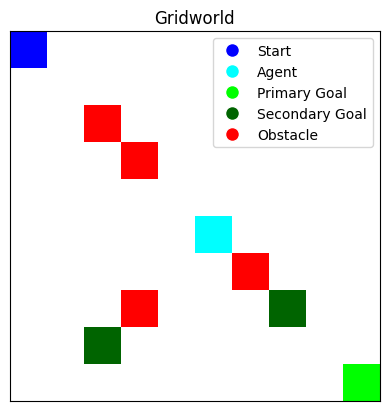

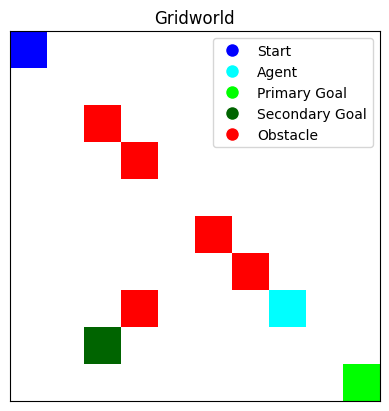

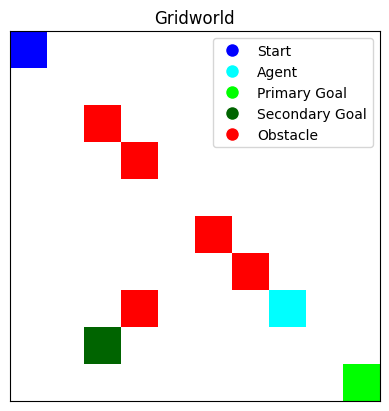

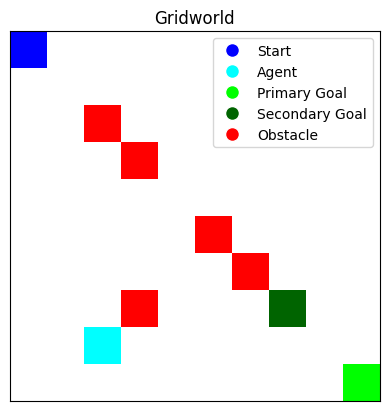

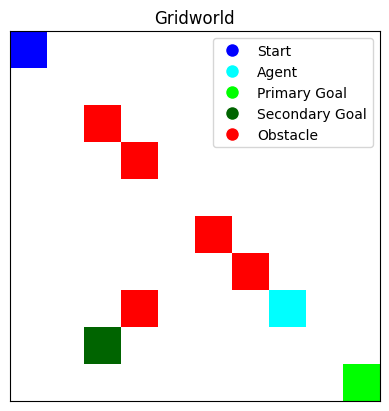

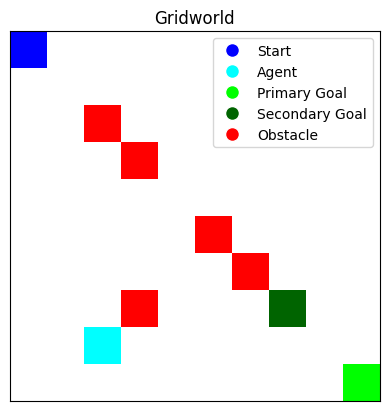

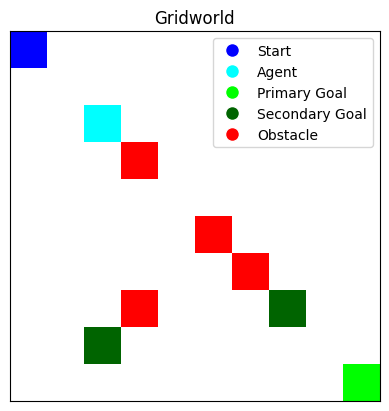

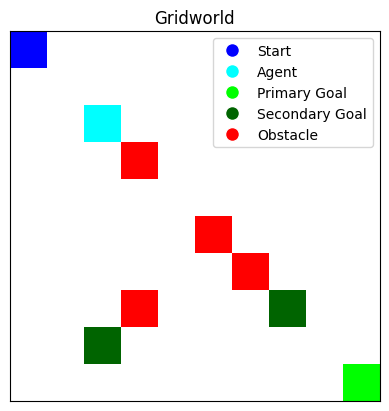

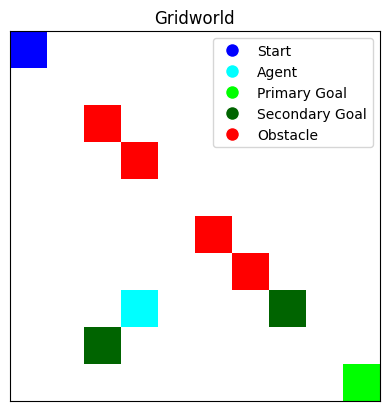

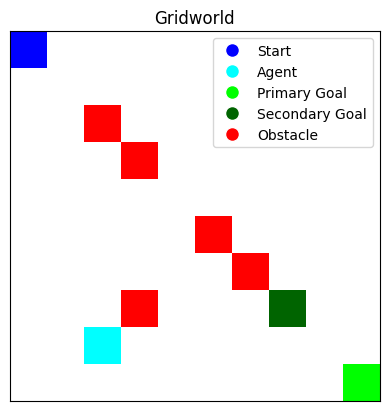

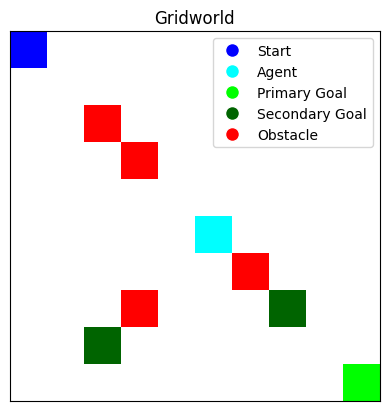

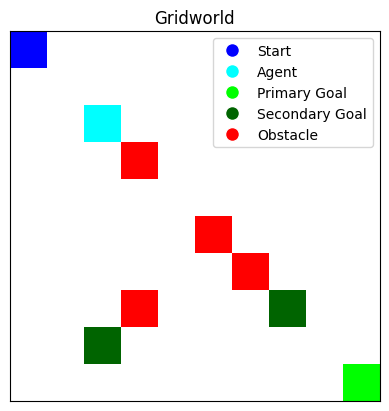

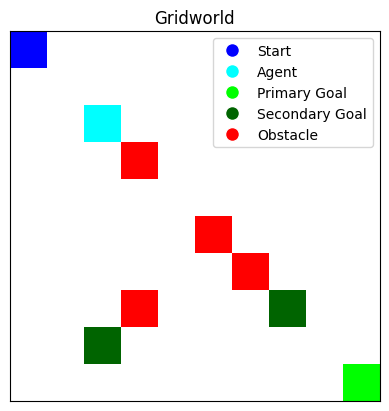

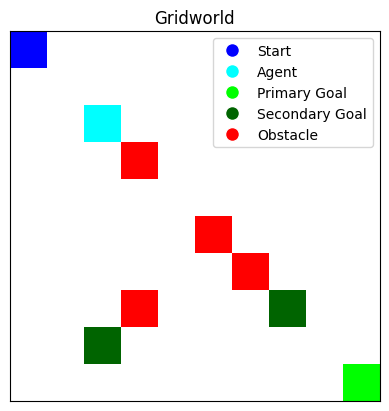

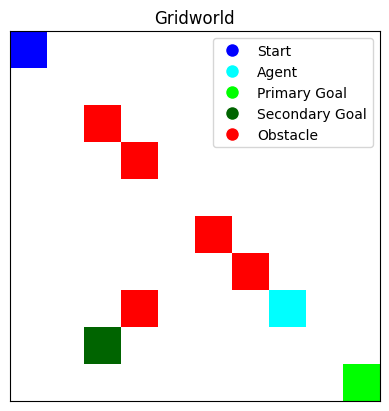

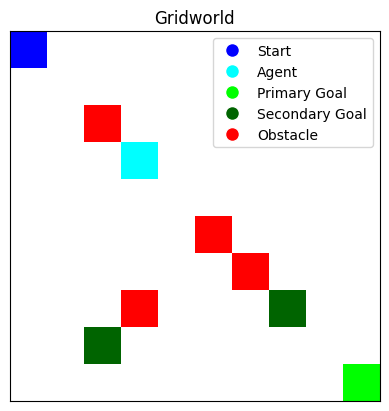

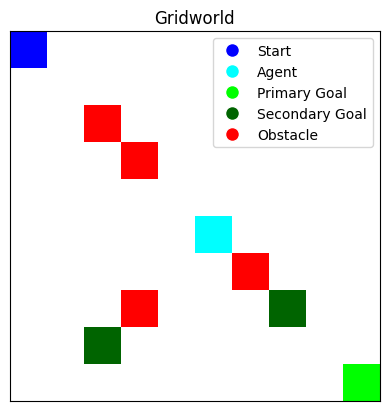

<Figure size 640x480 with 0 Axes>

In [33]:
env = ComplexGridworld()
agent = EnhancedQLearningAgent(actions=[0, 1, 2, 3])

episodes = 200
for episode in range(episodes):
    state = env.reset()
    done = False
    while not done:
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        agent.learn(state, action, reward, next_state, done)
        state = next_state

    if episode % 10 == 0:  # visualize every 10 episodes
        env.render()
        agent.decay_epsilon()



In [34]:
for state_action, value in agent.q_table.items():
    state, action = state_action
    print(f"State: {state}, Action: {action} => Q-value: {value:.2f}")

State: (0, 0), Action: 0 => Q-value: -4.60
State: (0, 0), Action: 2 => Q-value: -4.72
State: (0, 0), Action: 1 => Q-value: -4.56
State: (1, 0), Action: 0 => Q-value: -4.23
State: (1, 1), Action: 0 => Q-value: -3.78
State: (0, 1), Action: 0 => Q-value: -4.11
State: (0, 1), Action: 2 => Q-value: -4.20
State: (0, 0), Action: 3 => Q-value: -4.56
State: (0, 1), Action: 1 => Q-value: -4.06
State: (1, 1), Action: 1 => Q-value: -3.72
State: (2, 1), Action: 3 => Q-value: -3.75
State: (1, 0), Action: 1 => Q-value: -4.09
State: (2, 0), Action: 2 => Q-value: -3.52
State: (2, 0), Action: 0 => Q-value: -3.84
State: (1, 0), Action: 2 => Q-value: -4.13
State: (2, 0), Action: 1 => Q-value: -3.53
State: (3, 0), Action: 0 => Q-value: -3.15
State: (1, 0), Action: 3 => Q-value: -4.07
State: (1, 1), Action: 2 => Q-value: -3.81
State: (0, 1), Action: 3 => Q-value: -4.06
State: (0, 2), Action: 0 => Q-value: -3.63
State: (0, 2), Action: 1 => Q-value: -3.60
State: (1, 2), Action: 0 => Q-value: -3.28
State: (0, 